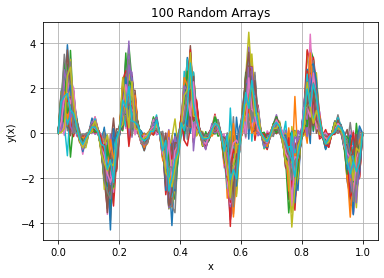

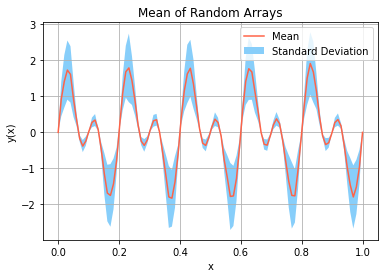

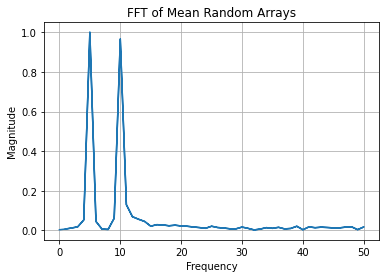

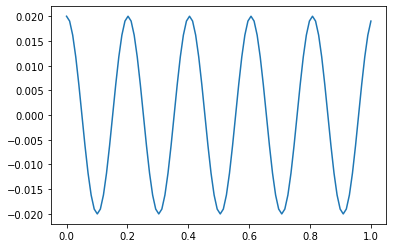

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
import scipy.signal
import pandas as pd

def f(x):
    return np.sin(10 * np.pi * x) + np.sin(20 * np.pi * x)

# Make an array to plot everything on
n = 100
x = np.linspace(0, 1, n)

# Plot a bunch of functions with random noise
numberOfArrays = 100
allPlots = []
noise = []
noiseDistribution = 'Gaussian'

for i in range(0, numberOfArrays):
    if noiseDistribution == 'Gaussian':
        noise = np.random.normal(0, abs(f(x)) / 2, None) #* 100
    if noiseDistribution == 'Poisson':
        noise = np.random.poisson(1, None)
    y = f(x) + noise
    allPlots.append(y)
    plt.plot(x, y)
plt.title(f'{numberOfArrays} Random Arrays')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

# Now plot the mean of all the different plots
allPlots = pd.DataFrame(allPlots)
meanPlots = pd.Series.mean(allPlots)
stdPlots = pd.Series.std(allPlots)

plt.title(f'Mean of Random Arrays')
plt.plot(x, meanPlots, 'tomato', label = 'Mean')
plt.fill_between(x, meanPlots - stdPlots, meanPlots + stdPlots, facecolor = 'lightskyblue', label = 'Standard Deviation')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

# EXTRA CREDIT
# Now extract an plot the Fast Fourier Transform to identify the frequencies
freqSpace = np.fft.fftfreq(n, 1 / n)
frequencies = abs(np.fft.fft(meanPlots)) / max(abs(np.fft.fft(meanPlots)))
plt.title(f'FFT of Mean Random Arrays')
plt.plot(abs(freqSpace), frequencies.real)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# scipy.signal.butter(n, filteredFrequencies)
filt = np.where(frequencies == max(frequencies), 1, 0)
filteredFrequencies = np.fft.ifft(frequencies * filt)
plt.plot(x, filteredFrequencies.real)